In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [16]:
data.describe()

,User_ID,Occupation,Purchase
count,5.500680e+05,550068.000000,550068.000000
mean,1.003029e+06,8.076707,9263.968713
std,1.727592e+03,6.522660,5023.065394
min,1.000001e+06,0.000000,12.000000
25%,1.001516e+06,2.000000,5823.000000
50%,1.003077e+06,7.000000,8047.000000
75%,1.004478e+06,14.000000,12054.000000
max,1.006040e+06,20.000000,23961.000000


In [17]:
data["Marital_Status"]=pd.Categorical(data["Marital_Status"])
data["Product_Category"]=pd.Categorical(data["Product_Category"])
data["Occupation"]=pd.Categorical(data["Occupation"])
data["User_ID"]=pd.Categorical(data["User_ID"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [11]:
data.shape

(550068, 10)

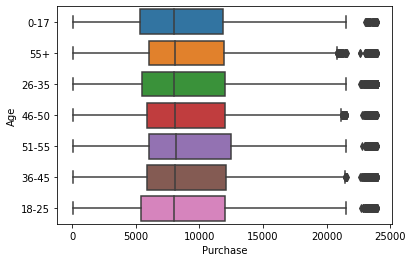

In [12]:
sns.boxplot(data=data, x="Purchase", y="Age")

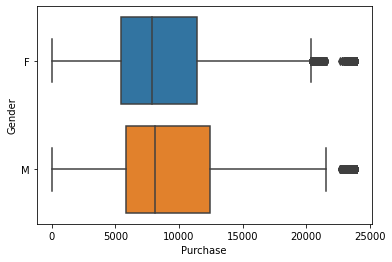

In [13]:
sns.boxplot(data=data, x="Purchase", y="Gender")

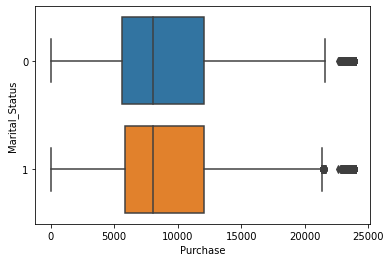

In [19]:
sns.boxplot(data=data, x="Purchase", y="Marital_Status")

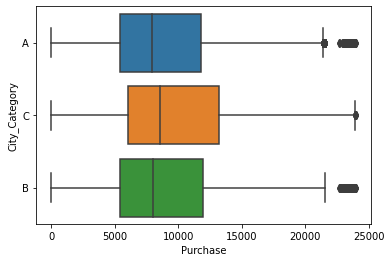

In [20]:
sns.boxplot(data=data, x="Purchase", y="City_Category")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


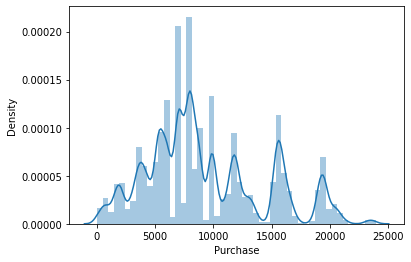

In [22]:
sns.distplot(data["Purchase"],kde=True)

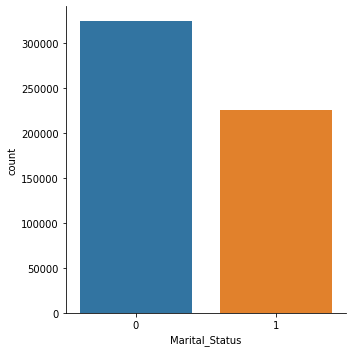

In [25]:
sns.catplot(data=data, x="Marital_Status", kind="count")

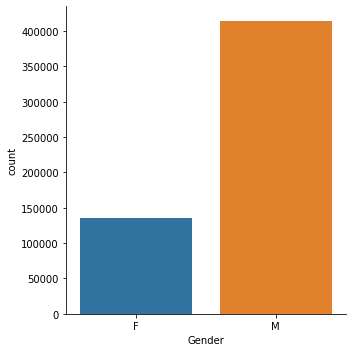

In [26]:
sns.catplot(data=data, x="Gender", kind="count")

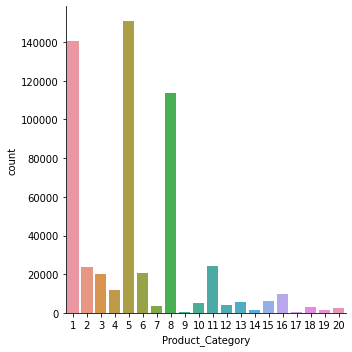

In [36]:
sns.catplot(data=data, x="Product_Category", kind="count")

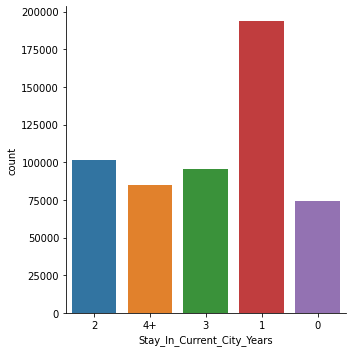

In [30]:
sns.catplot(data=data, x="Stay_In_Current_City_Years", kind="count")

In [40]:
data_by_stay=data.groupby(["Stay_In_Current_City_Years"]).mean("Purchase").round(2)

In [41]:
data_by_stay

,Purchase
Stay_In_Current_City_Years,
0,9180.08
1,9250.15
2,9320.43
3,9286.90
4+,9275.60


In [43]:
data["User_ID"].unique()

[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]

In [44]:
data_by_gen=data.groupby(["Gender"]).mean("Purchase").round(2)

In [45]:
data_by_gen

,Purchase
Gender,
F,8734.57
M,9437.53


In [48]:
sample_mean_male=[]
sample_mean_female=[]
sample_size=1000
male_data=data[data["Gender"]=="M"]
female_data=data[data["Gender"]=="F"]
for i in range(sample_size):
  sample_male=male_data.sample(frac=.60)
  sample_female=female_data.sample(frac=.60)
  sample_mean_male.append(sample_male["Purchase"].mean())
  sample_mean_female.append(sample_female["Purchase"].mean())

  



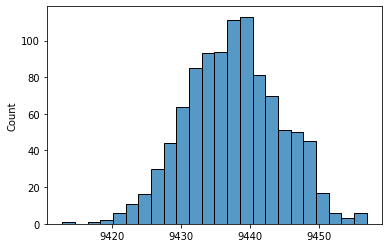

In [49]:
sns.histplot(sample_mean_male)

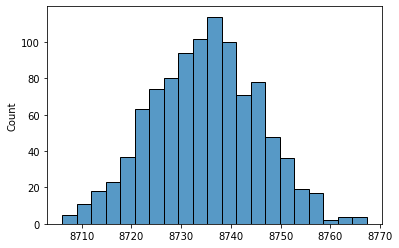

In [50]:
sns.histplot(sample_mean_female)

#for 95% confidence

In [52]:
import numpy as np
left_male=np.percentile(sample_mean_male, 2.5)
right_male=np.percentile(sample_mean_male, 97.5)
left_female=np.percentile(sample_mean_female, 2.5)
right_female=np.percentile(sample_mean_female, 97.5)
print("with 95 percent confidence<",left_male,",",right_male,">")
print("with 95 percent confidence<",left_female,",",right_female,">")

with 95 percent confidence< 9424.659393092072 , 9450.0866932872 >
with 95 percent confidence< 8713.866598760507 , 8755.71086703074 >


In [59]:
sample_mean_male=[]
sample_mean_female=[]
sample_size=1000
single_data=data[data["Marital_Status"]==0]
Maried_data=data[data["Marital_Status"]==1]
for i in range(sample_size):
  sample_male=single_data.sample(frac=.60)
  sample_female=Maried_data.sample(frac=.60)
  sample_mean_male.append(sample_male["Purchase"].mean())
  sample_mean_female.append(sample_female["Purchase"].mean())

  

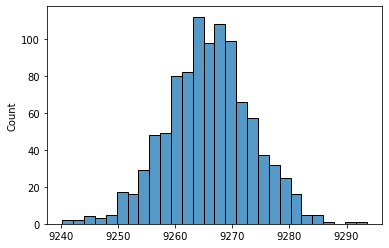

In [60]:
sns.histplot(sample_mean_male)

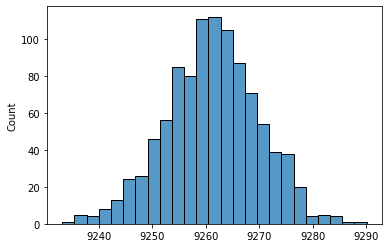

In [61]:
sns.histplot(sample_mean_female)

In [64]:
left_single=np.percentile(sample_mean_male, 2.5)
right_single=np.percentile(sample_mean_male, 97.5)
left_maried=np.percentile(sample_mean_female, 2.5)
right_maried=np.percentile(sample_mean_female, 97.5)
print("with 95 percent confidence single<",left_single,",",right_single,">")
print("with 95 percent confidence maried<",left_maried,",",right_maried,">")

with 95 percent confidence single< 9250.965425684795 , 9280.458975230831 >
with 95 percent confidence maried< 9243.734590649547 , 9277.144190914336 >


In [63]:
data.groupby(["Marital_Status"]).mean()

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


In [68]:
data_1_m=[]
data_2_m=[]
data_3_m=[]
data_4_m=[]
data_5_m=[]
data_6_m=[]
data_7_m=[]
sample_size=1000
data_1=data[data["Age"]=='0-17']
data_2=data[data["Age"]=='55+']
data_3=data[data["Age"]=='26-35']
data_4=data[data["Age"]=='46-50']
data_5=data[data["Age"]=='51-55']
data_6=data[data["Age"]=='36-45']
data_7=data[data["Age"]=='18-25']


for i in range(sample_size):
  data_1s=data_1.sample(frac=.60)
  data_2s=data_2.sample(frac=.60)
  data_3s=data_3.sample(frac=.60)
  data_4s=data_4.sample(frac=.60)
  data_5s=data_5.sample(frac=.60)
  data_6s=data_6.sample(frac=.60)
  data_7s=data_7.sample(frac=.60)
  data_1_m.append(data_1s["Purchase"].mean())
  data_2_m.append(data_2s["Purchase"].mean())
  data_3_m.append(data_3s["Purchase"].mean())
  data_4_m.append(data_4s["Purchase"].mean())
  data_5_m.append(data_5s["Purchase"].mean())
  data_6_m.append(data_6s["Purchase"].mean())
  data_7_m.append(data_7s["Purchase"].mean())



In [83]:
data_Age=data.groupby(["Age"]).mean()

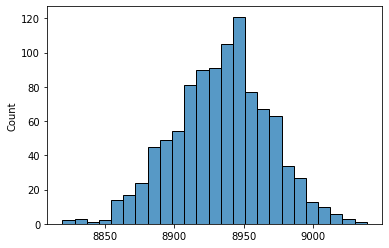

In [70]:
sns.histplot(data_1_m)


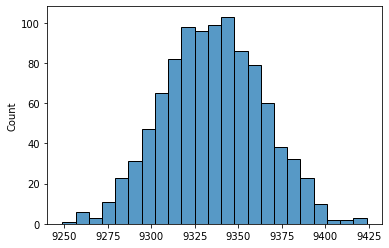

In [71]:
sns.histplot(data_2_m)

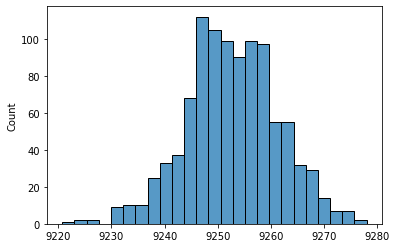

In [72]:
sns.histplot(data_3_m)

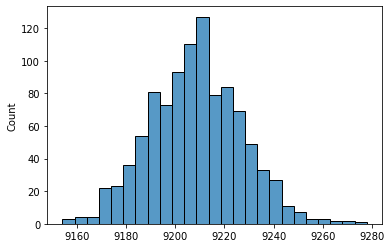

In [73]:
sns.histplot(data_4_m)

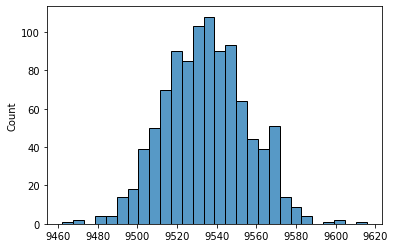

In [74]:
sns.histplot(data_5_m)

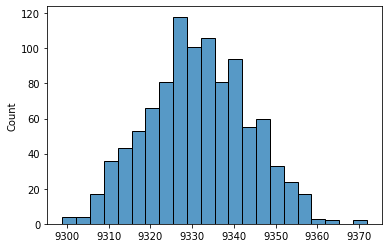

In [75]:
sns.histplot(data_6_m)

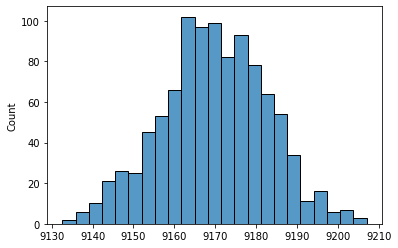

In [76]:
sns.histplot(data_7_m)

In [88]:
age_mean_data=[data_1_m,data_2_m,data_3_m,data_4_m,data_5_m,data_6_m,data_7_m]
age_mean=[]
for age_data in age_mean_data:
  left_age=np.percentile(age_data, 2.5)
  right_age=np.percentile(age_data, 97.5)
  
  print("with 95 percent confidence single<",left_age,",",right_age,">")
  age=f"<{left_age.round(2)}, {right_age.round(2)} >"
  age_mean.append(age)

with 95 percent confidence single< 8867.924740646728 , 8997.504844939853 >
with 95 percent confidence single< 9282.359977135327 , 9390.805454580686 >
with 95 percent confidence single< 9234.901989153865 , 9269.827701097516 >
with 95 percent confidence single< 9172.739843550564 , 9244.594952773421 >
with 95 percent confidence single< 9495.348116964633 , 9574.168670187437 >
with 95 percent confidence single< 9308.941087065205 , 9355.087379938795 >
with 95 percent confidence single< 9144.035004431735 , 9195.467872432939 >


In [89]:
data_Age["95% confidence"]=age_mean

In [90]:
data_Age

,Purchase,95% confidence
Age,,
0-17,8933.464640,"<8867.92, 8997.5 >"
18-25,9169.663606,"<9282.36, 9390.81 >"
26-35,9252.690633,"<9234.9, 9269.83 >"
36-45,9331.350695,"<9172.74, 9244.59 >"
46-50,9208.625697,"<9495.35, 9574.17 >"
51-55,9534.808031,"<9308.94, 9355.09 >"
55+,9336.280459,"<9144.04, 9195.47 >"


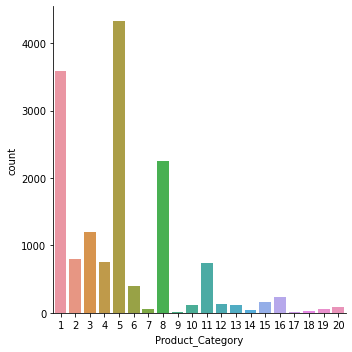

In [92]:
data_17=data[data["Age"]=='0-17']
sns.catplot(data=data_17, x="Product_Category", kind="count")

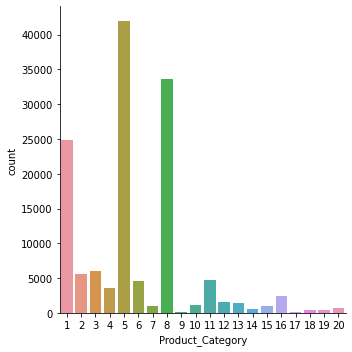

In [94]:
data_g=data[data["Gender"]=="F"]
sns.catplot(data=data_g, x="Product_Category", kind="count")

##Summary


1.   The data consist of significant amount outliers as shown in boxplot
2.   We are considering 95% of data to avoid outliers yet significant population
3. Average purchase value of female is 8734.57 and for male is 	9437.53
4. Average transaction from female are less to verify this we used bootstaping later calculating intervals ,confidence intervals of female(< 8713.866598760507 , 8755.71086703074 >)is less than of male < 9424.659393092072 , 9450.0866932872 >
5. After gender we checked for Martial status which have overlaping intervals an it does effect much our taget variable which is purchase
6.Age of almost constant just for 0-17 we can focus as they have low purcahase value .
7.Number of female is less than male in store 



##**Actionable Insight**


1.   we have increase footfall of woman as no female customers as they less in no as compared male.
2.   Try to increase average transaction value for female by product targeting ,upselling and marketing .
3.product (5,8) are more selling for female.
3.People from age group 0-17 have less transaction value 
4.product(1,5,8,11) should be used increase transaction values for this age group
5.Marital staus may not effect the purchase value much.
